In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
data_df = pd.read_csv("train.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 27 columns):
user          880 non-null int64
press-0       880 non-null int64
release-0     880 non-null int64
press-1       880 non-null int64
release-1     880 non-null int64
press-2       880 non-null int64
release-2     880 non-null int64
press-3       880 non-null int64
release-3     880 non-null int64
press-4       880 non-null int64
release-4     880 non-null int64
press-5       880 non-null int64
release-5     880 non-null int64
press-6       880 non-null int64
release-6     880 non-null int64
press-7       880 non-null int64
release-7     880 non-null int64
press-8       880 non-null int64
release-8     880 non-null int64
press-9       880 non-null int64
release-9     880 non-null int64
press-10      880 non-null int64
release-10    880 non-null int64
press-11      880 non-null int64
release-11    880 non-null int64
press-12      880 non-null int64
release-12    880 non-null int64
dtyp

In [4]:
N_SAMPLES = len(data_df)
print(N_SAMPLES)

880


In [5]:
data_df.user.value_counts()

110    8
41     8
30     8
31     8
32     8
      ..
77     8
78     8
79     8
80     8
1      8
Name: user, Length: 110, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data_df.drop("user",axis=1), data_df["user"],
                                                stratify= data_df["user"], 
                                                test_size=0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [7]:
model = tf.keras.Sequential([
    keras.layers.Input(shape=(26,)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(110,activation="softmax")   
])

In [8]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
21/21 [==============================] - 0s 11ms/step - loss: 4.6658 - accuracy: 0.0242 - val_loss: 4.5060 - val_accuracy: 0.0409
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 4.3127 - accuracy: 0.0591 - val_loss: 4.2341 - val_accuracy: 0.0636
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 3.9693 - accuracy: 0.0773 - val_loss: 4.0287 - val_accuracy: 0.0955
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 3.6134 - accuracy: 0.1167 - val_loss: 3.8150 - val_accuracy: 0.1273
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 3.3024 - accuracy: 0.1621 - val_loss: 3.6673 - val_accuracy: 0.1500
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 2.9975 - accuracy: 0.2061 - val_loss: 3.6789 - val_accuracy: 0.1227
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 2.7996 - accuracy: 0.2424 - val_loss: 3.5550 - val_accuracy: 0.1727
Epoch 8/50
21/21 [=

## Data engineering

We will extract these values from the available data:

    Hold Time (HT)
    Release-Press Time (RPT)
    Press-Press Time (PPT)


In [10]:
modified_df = data_df
labels = data_df["user"]
for i in range(1,13):
    modified_df['PPT-'+str(i)] = modified_df['press-'+str(i)] - modified_df['press-'+str(i-1)]
    modified_df['RPT-'+str(i)] = modified_df['release-'+str(i)] - modified_df['press-'+str(i-1)]

for i in range(13):
    modified_df['HT-'+str(i)] = modified_df['release-'+str(i)] - modified_df['press-'+str(i)]

In [11]:
with_labels = modified_df.drop(modified_df.iloc[:,1:27],axis=1)
modified_df = modified_df.iloc[:,-37:]

modified_df

,PPT-1,RPT-1,PPT-2,RPT-2,PPT-3,RPT-3,PPT-4,RPT-4,PPT-5,RPT-5,...,HT-3,HT-4,HT-5,HT-6,HT-7,HT-8,HT-9,HT-10,HT-11,HT-12
0,216,312,208,280,168,240,216,264,192,264,...,72,48,72,96,48,48,72,72,48,72
1,168,265,192,287,167,239,209,280,192,263,...,72,71,71,71,56,48,47,72,72,48
2,143,231,640,760,304,376,264,367,208,280,...,72,103,72,96,79,72,72,72,72,55
3,144,263,209,287,407,479,399,447,168,218,...,72,48,50,91,47,72,48,72,72,72
4,166,238,144,240,216,288,184,232,168,240,...,72,48,72,96,72,72,62,72,72,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,225,306,219,240,131,228,114,209,195,351,...,97,95,156,123,137,97,99,112,129,220
876,217,289,170,256,567,670,137,235,174,328,...,103,98,154,81,103,111,98,104,106,143
877,216,300,177,303,299,414,115,202,197,397,...,115,87,200,118,105,133,103,167,144,146
878,200,290,184,276,398,546,161,196,121,297,...,148,35,176,110,71,121,88,109,138,145


In [12]:
X_train, X_test, y_train, y_test = train_test_split(modified_df, labels,
                                                stratify= labels, 
                                                test_size=0.25)

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8190031C8>,
      dtype=object)

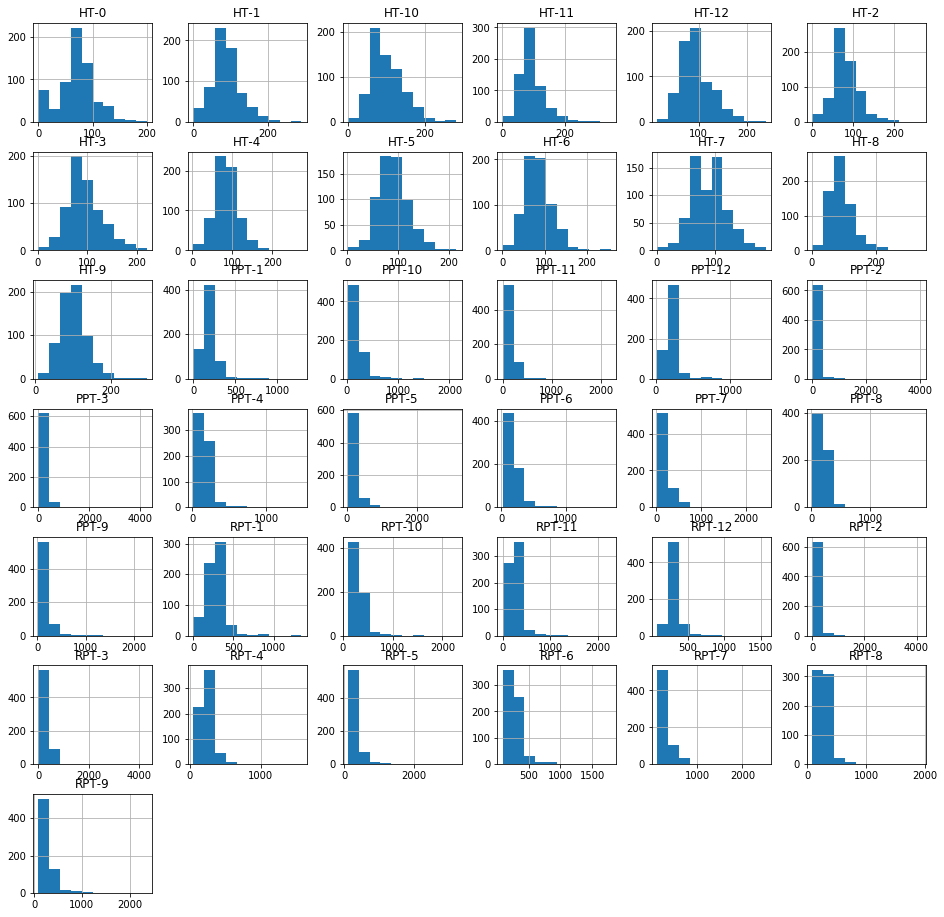

In [13]:
X_train.hist(figsize=(16,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8190124C8>,
      dtype=object)

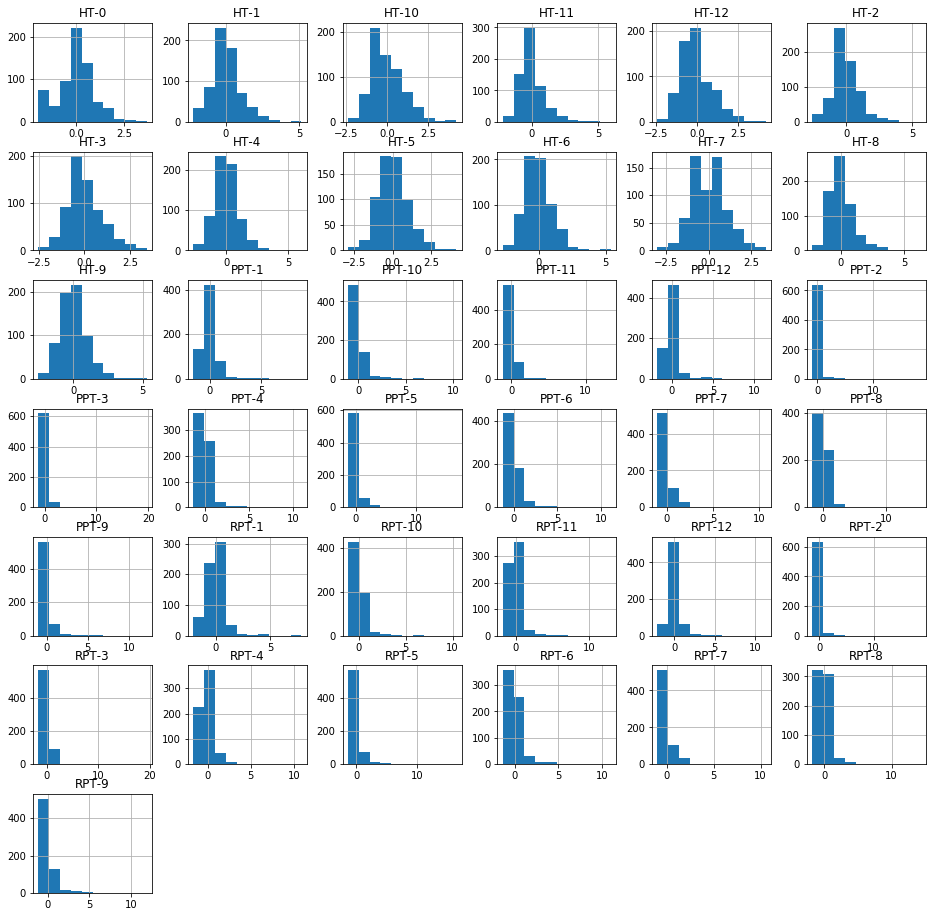

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

minmax = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.hist(figsize=(16,16))

In [15]:
model = tf.keras.Sequential([
    keras.layers.Input(shape=(37,)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(110,activation="softmax")   
])

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Epoch 1/20
21/21 [==============================] - 0s 8ms/step - loss: 4.6277 - accuracy: 0.0303 - val_loss: 4.3823 - val_accuracy: 0.1227
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 3.9037 - accuracy: 0.2015 - val_loss: 3.6964 - val_accuracy: 0.1909
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 2.9484 - accuracy: 0.3394 - val_loss: 3.0478 - val_accuracy: 0.3136
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 2.0337 - accuracy: 0.5167 - val_loss: 2.5398 - val_accuracy: 0.4000
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 1.4304 - accuracy: 0.6485 - val_loss: 2.5218 - val_accuracy: 0.4409
Epoch 6/20
21/21 [==============================] - 0s 3ms/step - loss: 1.0409 - accuracy: 0.7545 - val_loss: 2.2013 - val_accuracy: 0.4955
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.8242 - val_loss: 2.2053 - val_accuracy: 0.5045
Epoch 8/20
21/21 [==

# Results:

Best results are achieved using **scaled** and **prepared** data with validation accuarcy of **60%**

This is not an all that bad result considering every user(class) has only **8** instances

# Anomaly Detection

In [17]:
user1 = with_labels[with_labels.user==1]

scaler = StandardScaler()
scaled_user1 = pd.DataFrame(scaler.fit_transform(user1.drop("user",axis=1)),columns=user1.columns[1:])

user1

,user,PPT-1,RPT-1,PPT-2,RPT-2,PPT-3,RPT-3,PPT-4,RPT-4,PPT-5,...,HT-3,HT-4,HT-5,HT-6,HT-7,HT-8,HT-9,HT-10,HT-11,HT-12
0,1,216,312,208,280,168,240,216,264,192,...,72,48,72,96,48,48,72,72,48,72
1,1,168,265,192,287,167,239,209,280,192,...,72,71,71,71,56,48,47,72,72,48
2,1,143,231,640,760,304,376,264,367,208,...,72,103,72,96,79,72,72,72,72,55
3,1,144,263,209,287,407,479,399,447,168,...,72,48,50,91,47,72,48,72,72,72
4,1,166,238,144,240,216,288,184,232,168,...,72,48,72,96,72,72,62,72,72,96
5,1,144,240,168,269,208,279,192,263,312,...,71,71,47,47,150,45,37,71,71,71
6,1,143,240,192,280,257,328,215,311,328,...,71,96,55,104,73,81,48,72,72,72
7,1,144,240,168,232,161,232,215,287,240,...,71,72,48,80,48,94,48,96,69,48


In [18]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=1,n_init=10)
gm.fit(user1[0:7].drop("user",axis=1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [19]:
np.random.seed(42)
test_set = with_labels.iloc[np.random.randint(100,size=50,)]

print(np.where(test_set.user==1))

test_set

(array([13, 16, 20, 44, 46], dtype=int64),)


,user,PPT-1,RPT-1,PPT-2,RPT-2,PPT-3,RPT-3,PPT-4,RPT-4,PPT-5,...,HT-3,HT-4,HT-5,HT-6,HT-7,HT-8,HT-9,HT-10,HT-11,HT-12
51,7,193,265,183,255,168,240,312,384,234,...,72,72,94,47,72,47,46,50,72,96
92,12,544,640,184,279,144,217,48,144,264,...,73,96,96,94,108,96,95,112,54,95
14,2,192,337,97,208,88,207,71,191,192,...,119,120,96,119,70,144,117,112,96,96
71,9,192,312,73,192,279,447,120,220,288,...,168,100,48,96,99,64,48,72,96,88
60,8,448,502,267,336,301,373,168,240,240,...,72,72,75,46,72,72,96,72,69,48
20,3,72,144,121,192,159,255,48,144,312,...,96,96,120,96,96,73,61,120,96,96
82,11,97,216,168,248,544,674,72,193,280,...,130,121,71,96,24,39,73,89,100,98
86,11,96,232,185,256,71,167,72,168,216,...,96,96,72,72,73,96,64,121,82,96
74,10,192,265,184,256,145,220,215,335,192,...,75,120,112,72,72,72,80,1,72,96
74,10,192,265,184,256,145,220,215,335,192,...,75,120,112,72,72,72,80,1,72,96


In [20]:
results = gm.score_samples(test_set.drop("user",axis=1))

results

array([-5.27707238e+10, -1.98525051e+11, -7.72627601e+10, -5.56860219e+10,
       -9.78852696e+10, -6.59590202e+10, -1.81753535e+11, -3.12143071e+10,
       -7.46399696e+10, -7.46399696e+10, -8.16319248e+10, -4.56437669e+11,
       -4.06475562e+10,  1.48367700e+02, -5.39340652e+10, -4.96864891e+10,
        1.48367700e+02, -8.16319248e+10, -1.58845303e+12, -2.66022216e+10,
        1.48367700e+02, -5.39001738e+10, -5.88460923e+10, -6.59590202e+10,
       -6.40153951e+10, -7.99071516e+10, -4.30258152e+10, -5.39340652e+10,
       -4.10036497e+10, -7.31866542e+11, -4.80067682e+10, -4.99693598e+10,
       -3.87352253e+10, -6.27941198e+10, -5.88460923e+10, -7.80611658e+10,
       -7.72627601e+10, -4.93146948e+10, -4.93146948e+10, -5.13951409e+10,
       -4.93146948e+10, -9.94650857e+10, -2.95843474e+10, -5.39001738e+10,
        1.48367700e+02, -9.94650857e+10,  1.48367700e+02, -6.59590202e+10,
       -1.82744142e+11, -1.41364794e+11])

In [21]:
gm.score_samples(user1.drop("user",axis=1))

array([ 1.48367700e+02,  1.48367700e+02,  1.48367700e+02,  1.48367700e+02,
        1.48367700e+02,  1.48367700e+02,  1.48367700e+02, -6.21046278e+09])

In [22]:
user1[:5]

,user,PPT-1,RPT-1,PPT-2,RPT-2,PPT-3,RPT-3,PPT-4,RPT-4,PPT-5,...,HT-3,HT-4,HT-5,HT-6,HT-7,HT-8,HT-9,HT-10,HT-11,HT-12
0,1,216,312,208,280,168,240,216,264,192,...,72,48,72,96,48,48,72,72,48,72
1,1,168,265,192,287,167,239,209,280,192,...,72,71,71,71,56,48,47,72,72,48
2,1,143,231,640,760,304,376,264,367,208,...,72,103,72,96,79,72,72,72,72,55
3,1,144,263,209,287,407,479,399,447,168,...,72,48,50,91,47,72,48,72,72,72
4,1,166,238,144,240,216,288,184,232,168,...,72,48,72,96,72,72,62,72,72,96


# One-Class SVM

In [23]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel="rbf",nu=0.5,gamma="scale")

svm.fit(scaled_user1)

svm.predict(scaled_user1)

array([ 1,  1,  1, -1, -1,  1, -1, -1], dtype=int64)

In [24]:
svm.predict(scaler.transform(test_set.drop("user",axis=1)))

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
      dtype=int64)

## Results:

Doesn't work on only 8 instances at all

Scaling the data is important, but still doesn't help much

# Novelty detection with Local Outlier Factor

In [25]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=8,novelty=True,contamination=0.00001)

lof.fit(scaled_user1)

lof.predict(scaled_user1)

array([1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
results = lof.predict(scaler.transform(with_labels.drop("user",axis=1)))

results

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [27]:
np.where(results==1)

# [13, 16, 20, 44, 46]

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),)

## Results:

Actually works on scaled data, even with small number of instances

In [28]:
scaled_user1[:5]

,PPT-1,RPT-1,PPT-2,RPT-2,PPT-3,RPT-3,PPT-4,RPT-4,PPT-5,RPT-5,...,HT-3,HT-4,HT-5,HT-6,HT-7,HT-8,HT-9,HT-10,HT-11,HT-12
0,2.407354,2.349643,-0.210584,-0.301171,-0.855871,-0.849757,-0.318293,-0.652388,-0.581388,-0.431097,...,0.774597,-1.077573,1.002662,0.624640,-0.739461,-1.114579,1.475648,-0.35977,-2.624756,0.350243
1,0.397737,0.457853,-0.315466,-0.258473,-0.868457,-0.862322,-0.425669,-0.406058,-0.581388,-0.449943,...,0.774597,0.068516,0.912535,-0.811314,-0.489062,-1.114579,-0.602730,-0.35977,0.448129,-1.250869
2,-0.648939,-0.910675,2.621238,2.626666,0.855871,0.859181,0.417999,0.933357,-0.307794,-0.129565,...,0.774597,1.663075,1.002662,0.624640,0.230837,0.331361,1.475648,-0.35977,0.448129,-0.783878
3,-0.607072,0.377352,-0.204029,-0.258473,2.152263,2.153449,2.488820,2.165003,-0.991779,-1.298002,...,0.774597,-1.077573,-0.980130,0.337449,-0.770761,0.331361,-0.519594,-0.35977,0.448129,0.350243
4,0.314003,-0.628919,-0.630113,-0.545157,-0.251727,-0.246602,-0.809154,-1.145046,-0.991779,-0.883395,...,0.774597,-1.077573,1.002662,0.624640,0.011737,0.331361,0.644297,-0.35977,0.448129,1.951356


In [29]:
user2 = with_labels[with_labels.user==2]

scaler = StandardScaler()
scaled_user2 = pd.DataFrame(scaler.fit_transform(user2.drop("user",axis=1)),columns=user2.columns[1:])

lof = LocalOutlierFactor(n_neighbors=8,novelty=True,contamination=0.00001)

lof.fit(scaled_user2)

lof.predict(scaled_user2)

array([1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
results = lof.predict(scaler.transform(with_labels.drop("user",axis=1)))

results

np.where(results==1)

(array([ 8,  9, 10, 11, 12, 13, 14, 15], dtype=int64),)

In [31]:
lof.negative_outlier_factor_ 

array([-1.00011808, -1.00679734, -0.98897395, -0.99842163, -1.00532863,
       -1.00701913, -0.98897395, -1.00471142])

# Local Outlier Factor

- **lof.predict()**:
    - returns 1 if inlier
    - returns -1 if outlier

- **lof.score_samples()** is the oposite of LOF(X) because "bigger is better" i.e. large values are inliers:
    - $-1 < x < 0$ -> inlier
    - $x < -1$ -> outlier
    
- **lof.decison_function()** applies offset to score_samples: self._score_samples(X) - self.offset_
    - offset is calculated based on contamination
    - this is used in the predict() method
    - $x > 0$ -> inlier
    - $x < 0$ -> outlier
    
![n_neighbors = 4](image1.png)

**k-distance** is the distance of a point to its k<sup>th</sup> closest neighbor according to some distance measure.

Set of k nearest neigbhors is $N_k(A)$

$k \neq N_k(A)$ in cases where there are more points at the same k-distance

Then **reachability distance** is calculated:

    - reachability-distance k(A,B)=max{k-distance(B), d(A,B)}
    
In other words, if point A is within the k-neighbors of point B, then the reachability-distance k(A,B) will be the k-distance of B. <br>
Otherwise it will be the distance between A and B.

![reachability distance](image2.png)

Next using the reachability distance we measure the **local reachability density**:

$\LARGE lrd(A) = \frac{1}{\frac{\sum_{B \in N_{k}(A)} reachabilityDistance(A,B)}{|N_k(A)|}}$

    - Inverse of the average of the reachabilityDistance of A to all its k-neighbors
    - The distance at which A can be reached from its neighbors

$B$ - neighbors of point A

![LOF](image3.png)

The **local reachability densities** are then compared to the other neighbors with the following equation:

$\Large LOF_{k}(A)=\frac{\sum_{B \in N_{k}(A)} \operatorname{lrd}_{k}(B)}{\left|N_{k}(A)\right| \cdot \operatorname{lrd}_{k}(A)}$

    - The LOF tells the density of the point compared to the density of its neighbors. If the density of a point is smaller than the densities of its neighbors (LOF >1), then it is considered as an outlier because the point is further than the dense area.
    - If the ratio is greater than 1, the density of point A is smaller than the density of its neighbors which means that from point A, it needs to travel much longer d istances to get to the next point than from A's neighbors to their next neighbors

- LOF(k) ~ 1 means Similar density as neighbors.
- LOF(k) < 1 means Higher density than neighbors (Inlier/not an outlier).
- LOF(k) > 1 means Lower density than neighbors (Outlier)

In [32]:
with_labels

,user,PPT-1,RPT-1,PPT-2,RPT-2,PPT-3,RPT-3,PPT-4,RPT-4,PPT-5,...,HT-3,HT-4,HT-5,HT-6,HT-7,HT-8,HT-9,HT-10,HT-11,HT-12
0,1,216,312,208,280,168,240,216,264,192,...,72,48,72,96,48,48,72,72,48,72
1,1,168,265,192,287,167,239,209,280,192,...,72,71,71,71,56,48,47,72,72,48
2,1,143,231,640,760,304,376,264,367,208,...,72,103,72,96,79,72,72,72,72,55
3,1,144,263,209,287,407,479,399,447,168,...,72,48,50,91,47,72,48,72,72,72
4,1,166,238,144,240,216,288,184,232,168,...,72,48,72,96,72,72,62,72,72,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,110,225,306,219,240,131,228,114,209,195,...,97,95,156,123,137,97,99,112,129,220
876,110,217,289,170,256,567,670,137,235,174,...,103,98,154,81,103,111,98,104,106,143
877,110,216,300,177,303,299,414,115,202,197,...,115,87,200,118,105,133,103,167,144,146
878,110,200,290,184,276,398,546,161,196,121,...,148,35,176,110,71,121,88,109,138,145


In [33]:
with_labels["user"].value_counts().size

110

In [34]:
with_labels.loc[with_labels["user"]==1]

,user,PPT-1,RPT-1,PPT-2,RPT-2,PPT-3,RPT-3,PPT-4,RPT-4,PPT-5,...,HT-3,HT-4,HT-5,HT-6,HT-7,HT-8,HT-9,HT-10,HT-11,HT-12
0,1,216,312,208,280,168,240,216,264,192,...,72,48,72,96,48,48,72,72,48,72
1,1,168,265,192,287,167,239,209,280,192,...,72,71,71,71,56,48,47,72,72,48
2,1,143,231,640,760,304,376,264,367,208,...,72,103,72,96,79,72,72,72,72,55
3,1,144,263,209,287,407,479,399,447,168,...,72,48,50,91,47,72,48,72,72,72
4,1,166,238,144,240,216,288,184,232,168,...,72,48,72,96,72,72,62,72,72,96
5,1,144,240,168,269,208,279,192,263,312,...,71,71,47,47,150,45,37,71,71,71
6,1,143,240,192,280,257,328,215,311,328,...,71,96,55,104,73,81,48,72,72,72
7,1,144,240,168,232,161,232,215,287,240,...,71,72,48,80,48,94,48,96,69,48


In [35]:
def test_function(dataset, class_column = "user"):
    # No such class column error
    class_list = dataset[class_column].unique()
    for i in class_list[:30]:
        print(f"User #{i}")
        train_set = dataset.loc[dataset[class_column]==i].drop(class_column,axis=1)[:8] # Selecting only the first 5 elements
        
        scaler = StandardScaler()
        scaled_train_set = pd.DataFrame(scaler.fit_transform(train_set),columns=train_set.columns)
        
        lof = LocalOutlierFactor(n_neighbors=8, novelty=True, contamination=0.00001)
        lof.fit(scaled_train_set)
        
        scaled_dataset = pd.DataFrame(scaler.transform(dataset.drop(class_column,axis=1)),columns=train_set.columns)
        results = lof.predict(scaled_dataset)
        
        print(np.where(results==1))

User #2
[[872   0]
 [  4   4]]
True positive rate: 0.5
True negative rate: 1.0
User #3
[[872   0]
 [  1   7]]
True positive rate: 0.875
True negative rate: 1.0
User #4
[[872   0]
 [  2   6]]
True positive rate: 0.75
True negative rate: 1.0
User #5
[[872   0]
 [  2   6]]
True positive rate: 0.75
True negative rate: 1.0
User #6
[[872   0]
 [  3   5]]
True positive rate: 0.625
True negative rate: 1.0
User #7
[[867   5]
 [  3   5]]
True positive rate: 0.625
True negative rate: 0.9942660550458715
User #8
[[869   3]
 [  1   7]]
True positive rate: 0.875
True negative rate: 0.9965596330275229
User #9
[[872   0]
 [  2   6]]
True positive rate: 0.75
True negative rate: 1.0
User #10
[[872   0]
 [  3   5]]
True positive rate: 0.625
True negative rate: 1.0


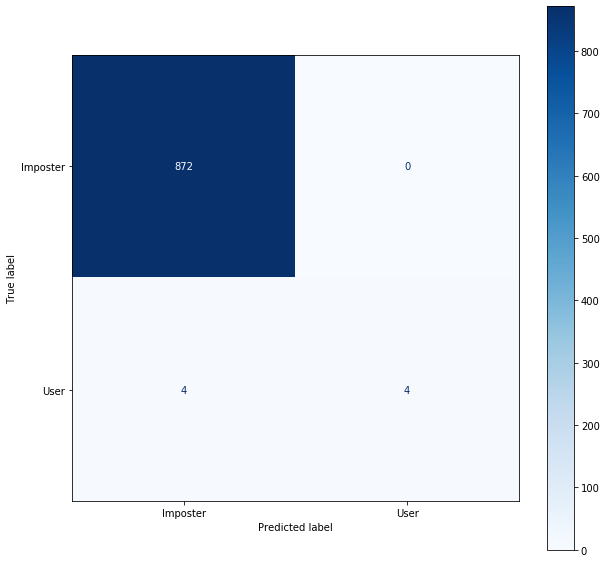

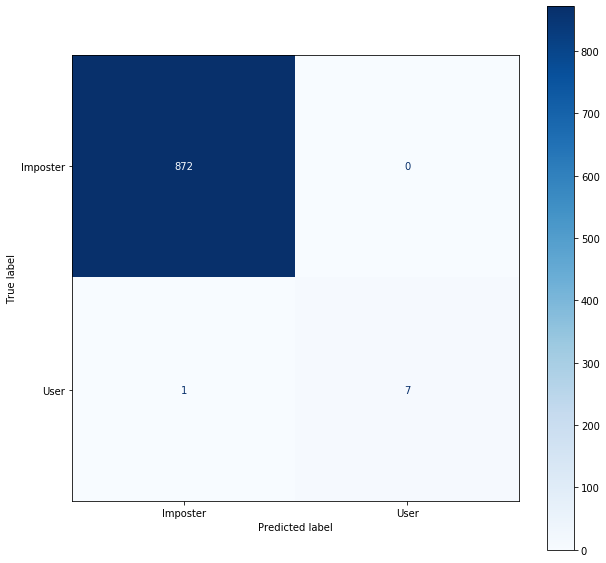

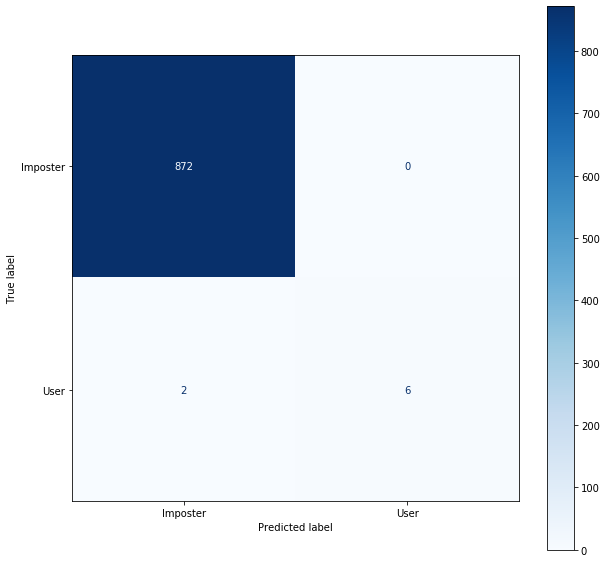

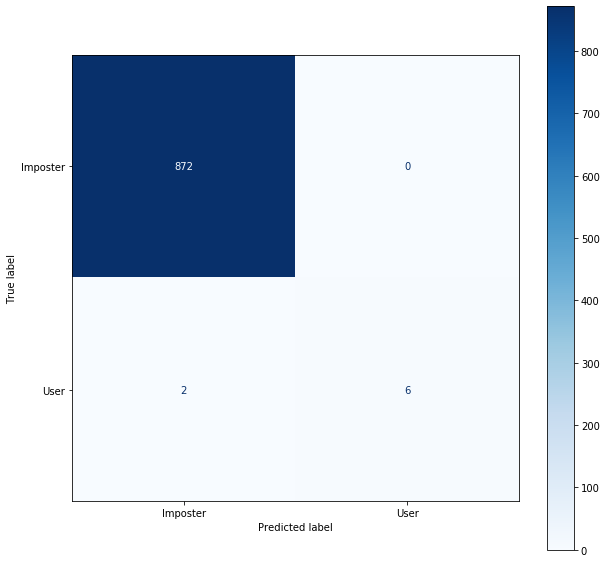

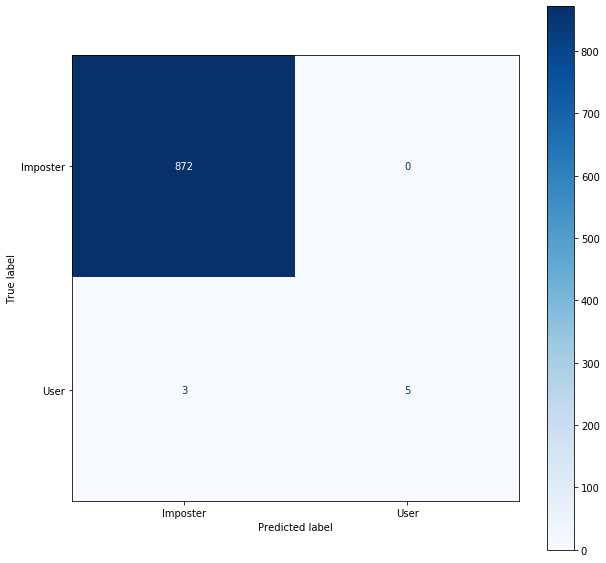

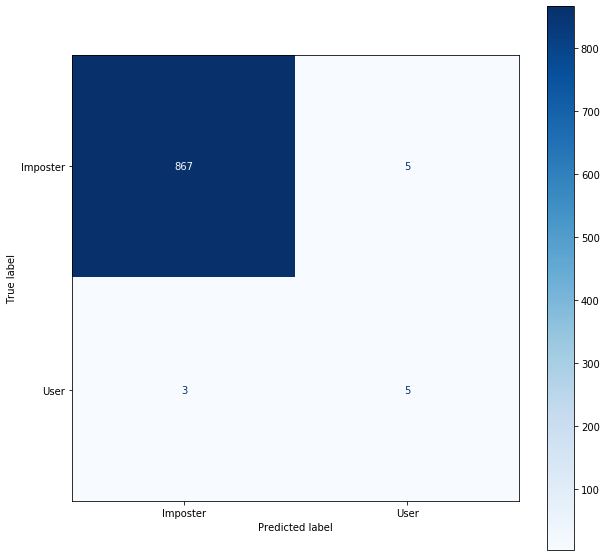

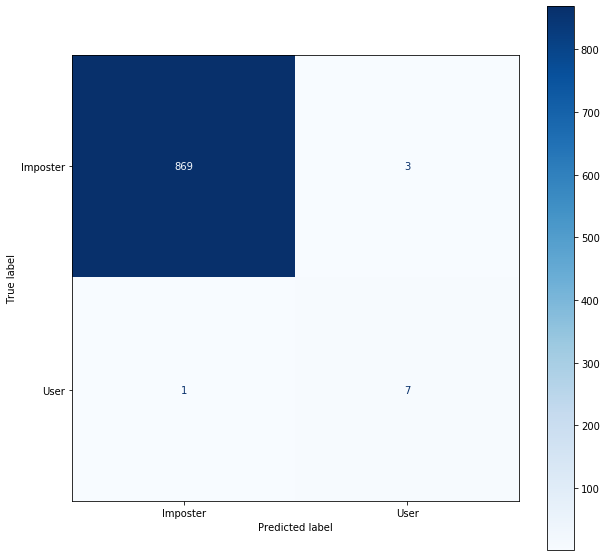

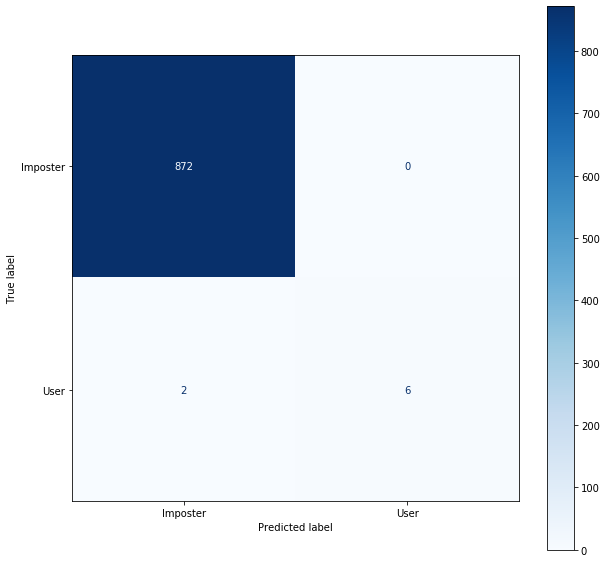

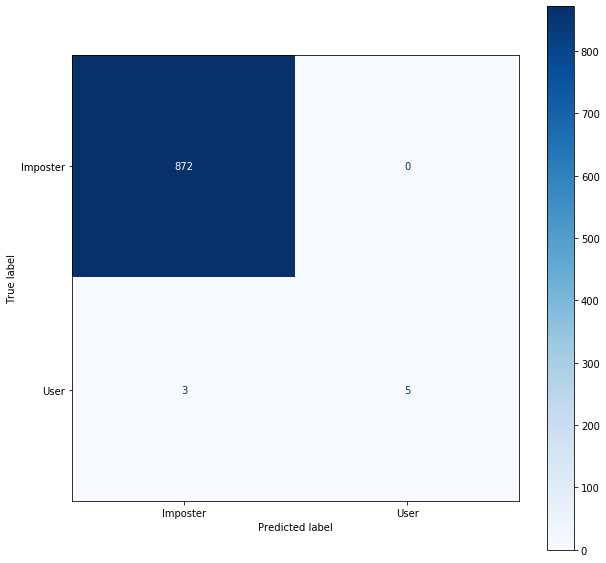

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def test_function(dataset, class_column = "user"):
    
    if class_column not in dataset.columns:
        msg = (f"class_column \"{class_column}\" does not exist in dataset")
        raise KeyError(msg)

    class_list = dataset[class_column].unique()
    labels = dataset[class_column].copy()

    for i in class_list[1:10]:
        print(f"User #{i}")
        
        user_labels = labels.copy()
        user_labels[user_labels != i] = -1
        user_labels[user_labels == i] = 1
        user_labels = user_labels.astype("int32")
        
        train_set = dataset.loc[dataset[class_column]==i].drop(class_column,axis=1)[:5] # Selecting only the first 5 elements

        scaler = StandardScaler()
        scaled_train_set = pd.DataFrame(scaler.fit_transform(train_set),columns=train_set.columns)
        
        lof = LocalOutlierFactor(n_neighbors=5, novelty=True, contamination=0.00001)
        lof.fit(scaled_train_set)
        
        scaled_dataset = pd.DataFrame(scaler.transform(dataset.drop(class_column,axis=1)),columns=train_set.columns)
        results = lof.predict(scaled_dataset)
        
        conf_matrix = confusion_matrix(user_labels.values,results)
        print(conf_matrix)
        
        fig, ax = plt.subplots(figsize=(10,10))
        display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Imposter","User"])
        display.plot(cmap=plt.cm.Blues, values_format="d",ax=ax)
        
        true_positive_rate = conf_matrix[1,1] / conf_matrix[1,:].sum()
        print(f"True positive rate: {true_positive_rate}")
        
        true_negative_rate = conf_matrix[0,0] / conf_matrix[0,:].sum()
        print(f"True negative rate: {true_negative_rate}")
        
test_function(with_labels)